# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ahcmad Ardhi Arridho
- Email: ardhigt17@gmail.com
- Id Dicoding: ardhi_arridho

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    precision_recall_curve, 
    roc_curve, 
    auc
)

import joblib
import pickle


### Menyiapkan data yang akan diguankan

## Data Understanding

### **Data Ghatering**

In [28]:
# Load dataset yang diperlukan dan gunakan delimiter karena dataset tidak menggunakan koma(,) melainkan titik koma(;)
pd.set_option('display.max_columns', None)
df = pd.read_csv('data.csv', delimiter=';')
df.head()


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [29]:
#Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [30]:
#Cek statistik deskrptif tiap kolom dari dataset
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [31]:
#Cek nilai dari data yang hilang
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [32]:
#Cek nilai terduplikast dari dataset
df.duplicated().sum()

np.int64(0)

In [33]:
#Melihat jumlah nilai unik tiap kolom
df.nunique()

Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

In [34]:
#Menampilkan tipe data
df.dtypes

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

In [35]:
#cek kolom numerikal dan inisiasi fitur numerik
numerical_features = df.select_dtypes(include=['int64','float64'])
print(numerical_features.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

In [36]:
#cek kolom kategorikal dan inisiasi kolom kategorikal
categorical_features = df.select_dtypes(include=['object'])
print(categorical_features.columns)

Index(['Status'], dtype='object')


In [37]:
# Mengecek outlier pada fitur numerik menggunakan metode IQR
outlier_summary = {}

for col in numerical_features.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

print("Jumlah outlier pada setiap fitur numerik:")
for col, count in outlier_summary.items():
    print(f"{col}: {count}")


Jumlah outlier pada setiap fitur numerik:
Marital_status: 505
Application_mode: 0
Application_order: 541
Course: 442
Daytime_evening_attendance: 483
Previous_qualification: 707
Previous_qualification_grade: 179
Nacionality: 110
Mothers_qualification: 0
Fathers_qualification: 0
Mothers_occupation: 182
Fathers_occupation: 177
Admission_grade: 86
Displaced: 0
Educational_special_needs: 51
Debtor: 503
Tuition_fees_up_to_date: 528
Gender: 0
Scholarship_holder: 1099
Age_at_enrollment: 441
International: 110
Curricular_units_1st_sem_credited: 577
Curricular_units_1st_sem_enrolled: 424
Curricular_units_1st_sem_evaluations: 158
Curricular_units_1st_sem_approved: 180
Curricular_units_1st_sem_grade: 726
Curricular_units_1st_sem_without_evaluations: 294
Curricular_units_2nd_sem_credited: 530
Curricular_units_2nd_sem_enrolled: 369
Curricular_units_2nd_sem_evaluations: 109
Curricular_units_2nd_sem_approved: 44
Curricular_units_2nd_sem_grade: 877
Curricular_units_2nd_sem_without_evaluations: 282
Unem

Insight yang didapat dari data gathering adalah :
1. Dataset berisi 4424 data mahasiswa dengan 37 fitur
2. Tidak terdapat missing value pada dataset
3. Tidak terdapat Nilai duplikat pada dataset
4. 36 kolom numerik, namun banyak di antaranya merupakan data kategori yang dikodekan angka (contoh: Gender, Marital_status, Course). dan hanya satu kolom bertipe kategorikal (Status)
5. Terdapat banyak kolom yang memiliki outlier jika menggunakan metode IQR
6. Terdapat beberapa kolom yang tidak relevan dan akan di hapus

## Data Preparation / Preprocessing

### **Data Transformation**

Mengubah data numerik yang seharusnya kategorikal terlebih dahulu untuk melihat distribusi data kategorikal dan memudahkan proses EDA

In [38]:
# Menghapus kolom yang tidak relevan
df = df.drop(['Unemployment_rate', 'Inflation_rate', 'GDP'], axis=1)
# Menyalin dataset untuk tahapan EDA
df_eda = df.copy()

In [39]:
# Definisikan mapping pada kolom marital
marital_map = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto union',
    6: 'Legally separated'
}

# Ubah langsung kolom Marital_status menjadi kategori
df_eda['Marital_status'] = df_eda['Marital_status'].map(marital_map).astype('category')


In [40]:
# Defenisikan mapping pada kolom application_mode
application_mode_map = {
    1: "1st phase - general contingent",
    2: "Ordinance No. 612/93",
    5: "1st phase - special contingent (Azores Island)",
    7: "Holders of other higher courses",
    10: "Ordinance No. 854-B/99",
    15: "International student (bachelor)",
    16: "1st phase - special contingent (Madeira Island)",
    17: "2nd phase - general contingent",
    18: "3rd phase - general contingent",
    26: "Ordinance No. 533-A/99, item b2) (Different Plan)",
    27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
    39: "Over 23 years old",
    42: "Transfer",
    43: "Change of course",
    44: "Technological specialization diploma holders",
    51: "Change of institution/course",
    53: "Short cycle diploma holders",
    57: "Change of institution/course (International)"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Application_mode'] = df['Application_mode'].map(application_mode_map).astype('category')


In [41]:
# Defenisikan mapping pada kolom course
course_map = {
    33: "Biofuel Production Technologies",
    171: "Animation and Multimedia Design",
    8014: "Social Service (evening attendance)",
    9003: "Agronomy",
    9070: "Communication Design",
    9085: "Veterinary Nursing",
    9119: "Informatics Engineering",
    9130: "Equinculture",
    9147: "Management",
    9238: "Social Service",
    9254: "Tourism",
    9500: "Nursing",
    9556: "Oral Hygiene",
    9670: "Advertising and Marketing Management",
    9773: "Journalism and Communication",
    9853: "Basic Education",
    9991: "Management (evening attendance)"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Course'] = df['Course'].map(course_map).astype('category')


In [42]:
# Defenisikan mapping pada kolom daytime
daytime_evening_map = {
    1: "Daytime",
    0: "Evening"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].map(daytime_evening_map).astype('category')

In [43]:
# Defenisikan mapping pada kolom previous_qualificiation
previous_qualification_map = {
    1: "Secondary education",
    2: "Higher education - bachelor's degree",
    3: "Higher education - degree",
    4: "Higher education - master's",
    5: "Higher education - doctorate",
    6: "Frequency of higher education",
    9: "12th year of schooling - not completed",
    10: "11th year of schooling - not completed",
    12: "Other - 11th year of schooling",
    14: "10th year of schooling",
    15: "10th year of schooling - not completed",
    19: "Basic education 3rd cycle (9th/10th/11th year) or equiv.",
    38: "Basic education 2nd cycle (6th/7th/8th year) or equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    42: "Professional higher technical course",
    43: "Higher education - master (2nd cycle)"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Previous_qualification'] = df['Previous_qualification'].map(previous_qualification_map).astype('category')


In [44]:
# Defenisikan mapping pada kolom nationality
nacionality_map = {
    1: "Portuguese",
    2: "German",
    6: "Spanish",
    11: "Italian",
    13: "Dutch",
    14: "English",
    17: "Lithuanian",
    21: "Angolan",
    22: "Cape Verdean",
    24: "Guinean",
    25: "Mozambican",
    26: "Santomean",
    32: "Turkish",
    41: "Brazilian",
    62: "Romanian",
    100: "Moldova (Republic of)",
    101: "Mexican",
    103: "Ukrainian",
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Nacionality'] = df['Nacionality'].map(nacionality_map).astype('category')


In [45]:
#Defenisikan mapping pada kolom mothers_qualificaiton
mothers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    22: "Technical-professional course",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Mothers_qualification'] = df['Mothers_qualification'].map(mothers_qualification_map).astype('category')


In [46]:
#Defenisikan mapping pada kolom fathers_qualification
fathers_qualification_map = {
    1: "Secondary Education - 12th Year of Schooling or Eq.",
    2: "Higher Education - Bachelor's Degree",
    3: "Higher Education - Degree",
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: "Frequency of Higher Education",
    9: "12th Year of Schooling - Not Completed",
    10: "11th Year of Schooling - Not Completed",
    11: "7th Year (Old)",
    12: "Other - 11th Year of Schooling",
    13: "2nd year complementary high school course",
    14: "10th Year of Schooling",
    18: "General commerce course",
    19: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",
    20: "Complementary High School Course",
    22: "Technical-professional course",
    25: "Complementary High School Course - not concluded",
    26: "7th year of schooling",
    27: "2nd cycle of the general high school course",
    29: "9th Year of Schooling - Not Completed",
    30: "8th year of schooling",
    31: "General Course of Administration and Commerce",
    33: "Supplementary Accounting and Administration",
    34: "Unknown",
    35: "Can't read or write",
    36: "Can read without having a 4th year of schooling",
    37: "Basic education 1st cycle (4th/5th year) or equiv.",
    38: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",
    39: "Technological specialization course",
    40: "Higher education - degree (1st cycle)",
    41: "Specialized higher studies course",
    42: "Professional higher technical course",
    43: "Higher Education - Master (2nd cycle)",
    44: "Higher Education - Doctorate (3rd cycle)"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Fathers_qualification'] = df['Fathers_qualification'].map(fathers_qualification_map).astype('category')

In [47]:
#Defenisikan mapping pada kolom mother_oucpation
mothers_occupation_map = {
    0: "Student",
    1: "Legislative/Executive/Director",
    2: "Intellectual/Scientific Specialist",
    3: "Intermediate Technician/Profession",
    4: "Administrative staff",
    5: "Personal Services/Security/Sellers",
    6: "Farmers/Skilled Agri/Fish/Forestry",
    7: "Skilled Industry/Construction/Craftsmen",
    8: "Machine Operators/Assembly",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "Teachers",
    125: "ICT Specialists",
    131: "Intermediate Science/Engineering Technician",
    132: "Intermediate Health Technician",
    134: "Intermediate Legal/Social/Sports/Culture",
    141: "Office/Secretary/Data Processing",
    143: "Accounting/Statistical/Finance/Registry",
    144: "Other Admin Support",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    171: "Skilled Construction (not electricians)",
    173: "Skilled Printing/Jewelry/Artisans",
    175: "Food/Wood/Clothing/Other Industries",
    191: "Cleaning Workers",
    192: "Unskilled Agri/Fish/Forestry",
    193: "Unskilled Extractive/Construction/Transport",
    194: "Meal Prep Assistants"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Mothers_occupation'] = df['Mothers_occupation'].map(mothers_occupation_map).astype('category')

In [48]:
#Defenisikan mapping pada kolom fathers_qualification
fathers_occupation_map = {
    0: "Student",
    1: "Legislative/Executive/Director",
    2: "Intellectual/Scientific Specialist",
    3: "Intermediate Technician/Profession",
    4: "Administrative staff",
    5: "Personal Services/Security/Sellers",
    6: "Farmers/Skilled Agri/Fish/Forestry",
    7: "Skilled Industry/Construction/Craftsmen",
    8: "Machine Operators/Assembly",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors Admin/Commercial Services",
    114: "Hotel/Catering/Trade Directors",
    121: "Physical Sciences/Engineering Specialist",
    122: "Health professionals",
    123: "Teachers",
    124: "Finance/Admin/PR Specialist",
    131: "Intermediate Science/Engineering Technician",
    132: "Intermediate Health Technician",
    134: "Intermediate Legal/Social/Sports/Culture",
    135: "ICT Technicians",
    141: "Office/Secretary/Data Processing",
    143: "Accounting/Statistical/Finance/Registry",
    144: "Other Admin Support",
    151: "Personal Service Workers",
    152: "Sellers",
    153: "Personal Care Workers",
    154: "Protection/Security Services",
    161: "Market-oriented Farmers",
    163: "Subsistence Farmers/Fishermen/Hunters",
    171: "Skilled Construction (not electricians)",
    172: "Skilled Metallurgy/Metalworking",
    174: "Skilled Electricity/Electronics",
    175: "Food/Wood/Clothing/Other Industries",
    181: "Fixed Plant/Machine Operators",
    182: "Assembly Workers",
    183: "Vehicle Drivers/Mobile Equipment Operators",
    192: "Unskilled Agri/Fish/Forestry",
    193: "Unskilled Extractive/Construction/Transport",
    194: "Meal Prep Assistants",
    195: "Street Vendors/Service Providers"
}
#Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Fathers_occupation'] = df['Fathers_occupation'].map(fathers_occupation_map).astype('category')



In [49]:
#Mapping pada kolom displaced, special need, debtor, tuition_up_to_date, scholarship_holder, international.
displaced_map = {
    1: "Yes",
    0: "No"
}

special_needs_map = {
    1: "Yes",
    0: "No"
}

debtor_map = {
    1: "Yes",
    0: "No"
}

tuition_up_to_date_map = {
    1: "Yes",
    0: "No"
    
}
gender_map = {
    1: "Male",
    0: "Female"
}

scholarship_holder_map = {
    1: "Yes",
    0: "No"
}

international_map = {
    1: "Yes",
    0: "No"
}
# Mapping dan menambahkan kolom baru ke DataFrame
df_eda['Displaced'] = df['Displaced'].map(displaced_map).astype('category')
df_eda['Educational_special_needs'] = df['Educational_special_needs'].map(special_needs_map).astype('category')
df_eda['Debtor'] = df['Debtor'].map(debtor_map).astype('category')
df_eda['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].map(tuition_up_to_date_map).astype('category')
df_eda['Gender'] = df['Gender'].map(gender_map).astype('category')
df_eda['Scholarship_holder'] = df['Scholarship_holder'].map(scholarship_holder_map).astype('category')
df_eda['International'] = df['International'].map(international_map).astype('category')


In [50]:
#Cek fitur kategorikal untuk memvalidasi
print("Fitur kategorikal yang telah dibuat:")
print(df_eda.select_dtypes(include=['category']).columns)

Fitur kategorikal yang telah dibuat:
Index(['Marital_status', 'Application_mode', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
       'Fathers_occupation', 'Displaced', 'Educational_special_needs',
       'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'International'],
      dtype='object')


### **Exploratory Data Analysis**

#### **Univariate Analysis**

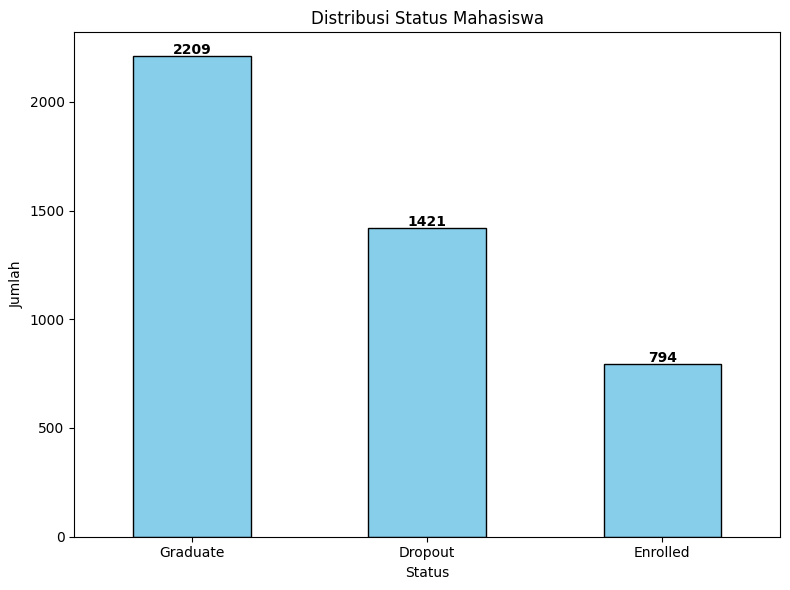

In [51]:
# Visualisasi kolom Status sebagai target
plt.figure(figsize=(8,6))
status_counts = df_eda['Status'].value_counts()
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
for i, v in enumerate(status_counts):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


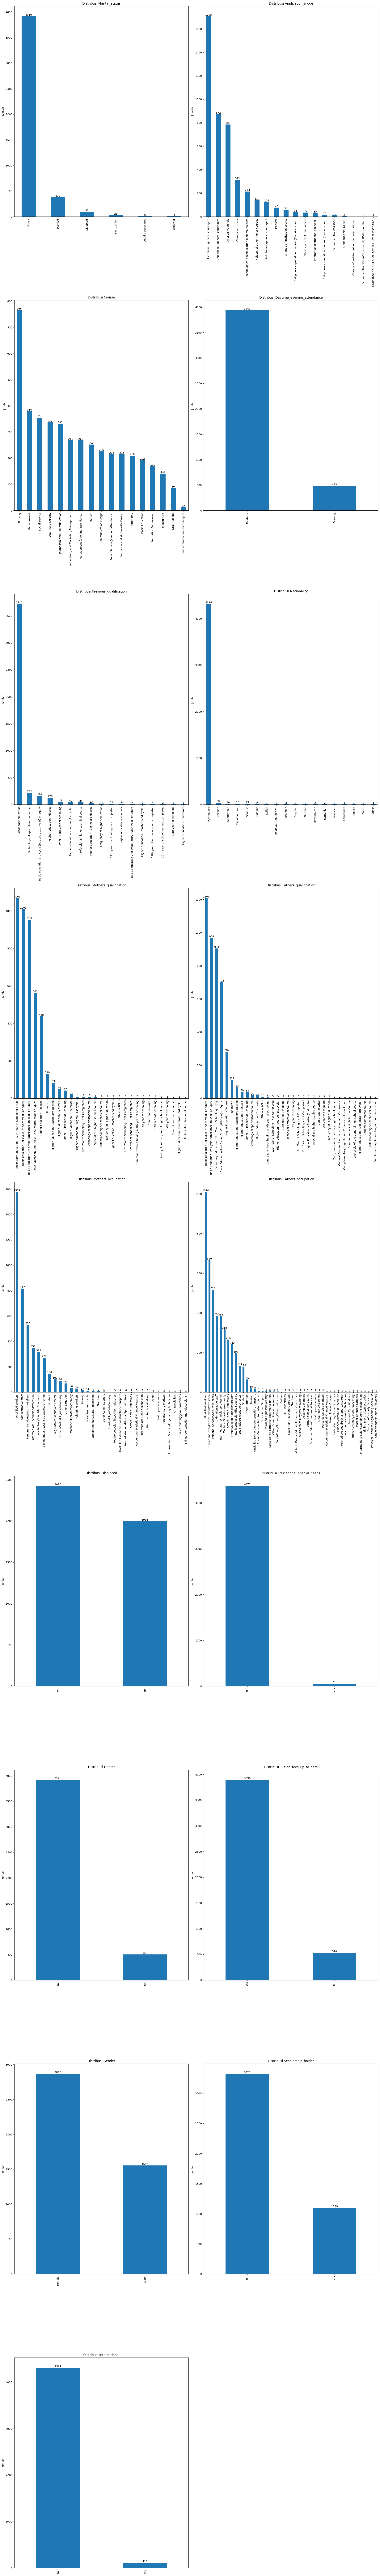

In [52]:
# Visualisasi univariate untuk fitur kategorikal
category_list = df_eda.select_dtypes(include=['category']).columns
n_cols = 2
n_rows = math.ceil(len(category_list) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*15))
axes = axes.flatten()

for i, col in enumerate(category_list):
    counts = df_eda[col].value_counts()
    ax = axes[i]
    counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Distribusi {col}')
    for p in ax.patches:
        ax.annotate(str(int(p.get_height())), 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah')

# Kosongkan subplot yang tidak terpakai
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Statistik deskriptif untuk kolom numerik bertipe int64 (dengan jumlah nilai unik):
                                               count       mean       std  \
Application_order                             4424.0   1.727848  1.313793   
Age_at_enrollment                             4424.0  23.265145  7.587816   
Curricular_units_1st_sem_credited             4424.0   0.709991  2.360507   
Curricular_units_1st_sem_enrolled             4424.0   6.270570  2.480178   
Curricular_units_1st_sem_evaluations          4424.0   8.299051  4.179106   
Curricular_units_1st_sem_approved             4424.0   4.706600  3.094238   
Curricular_units_1st_sem_without_evaluations  4424.0   0.137658  0.690880   
Curricular_units_2nd_sem_credited             4424.0   0.541817  1.918546   
Curricular_units_2nd_sem_enrolled             4424.0   6.232143  2.195951   
Curricular_units_2nd_sem_evaluations          4424.0   8.063291  3.947951   
Curricular_units_2nd_sem_approved             4424.0   4.435805  3.014

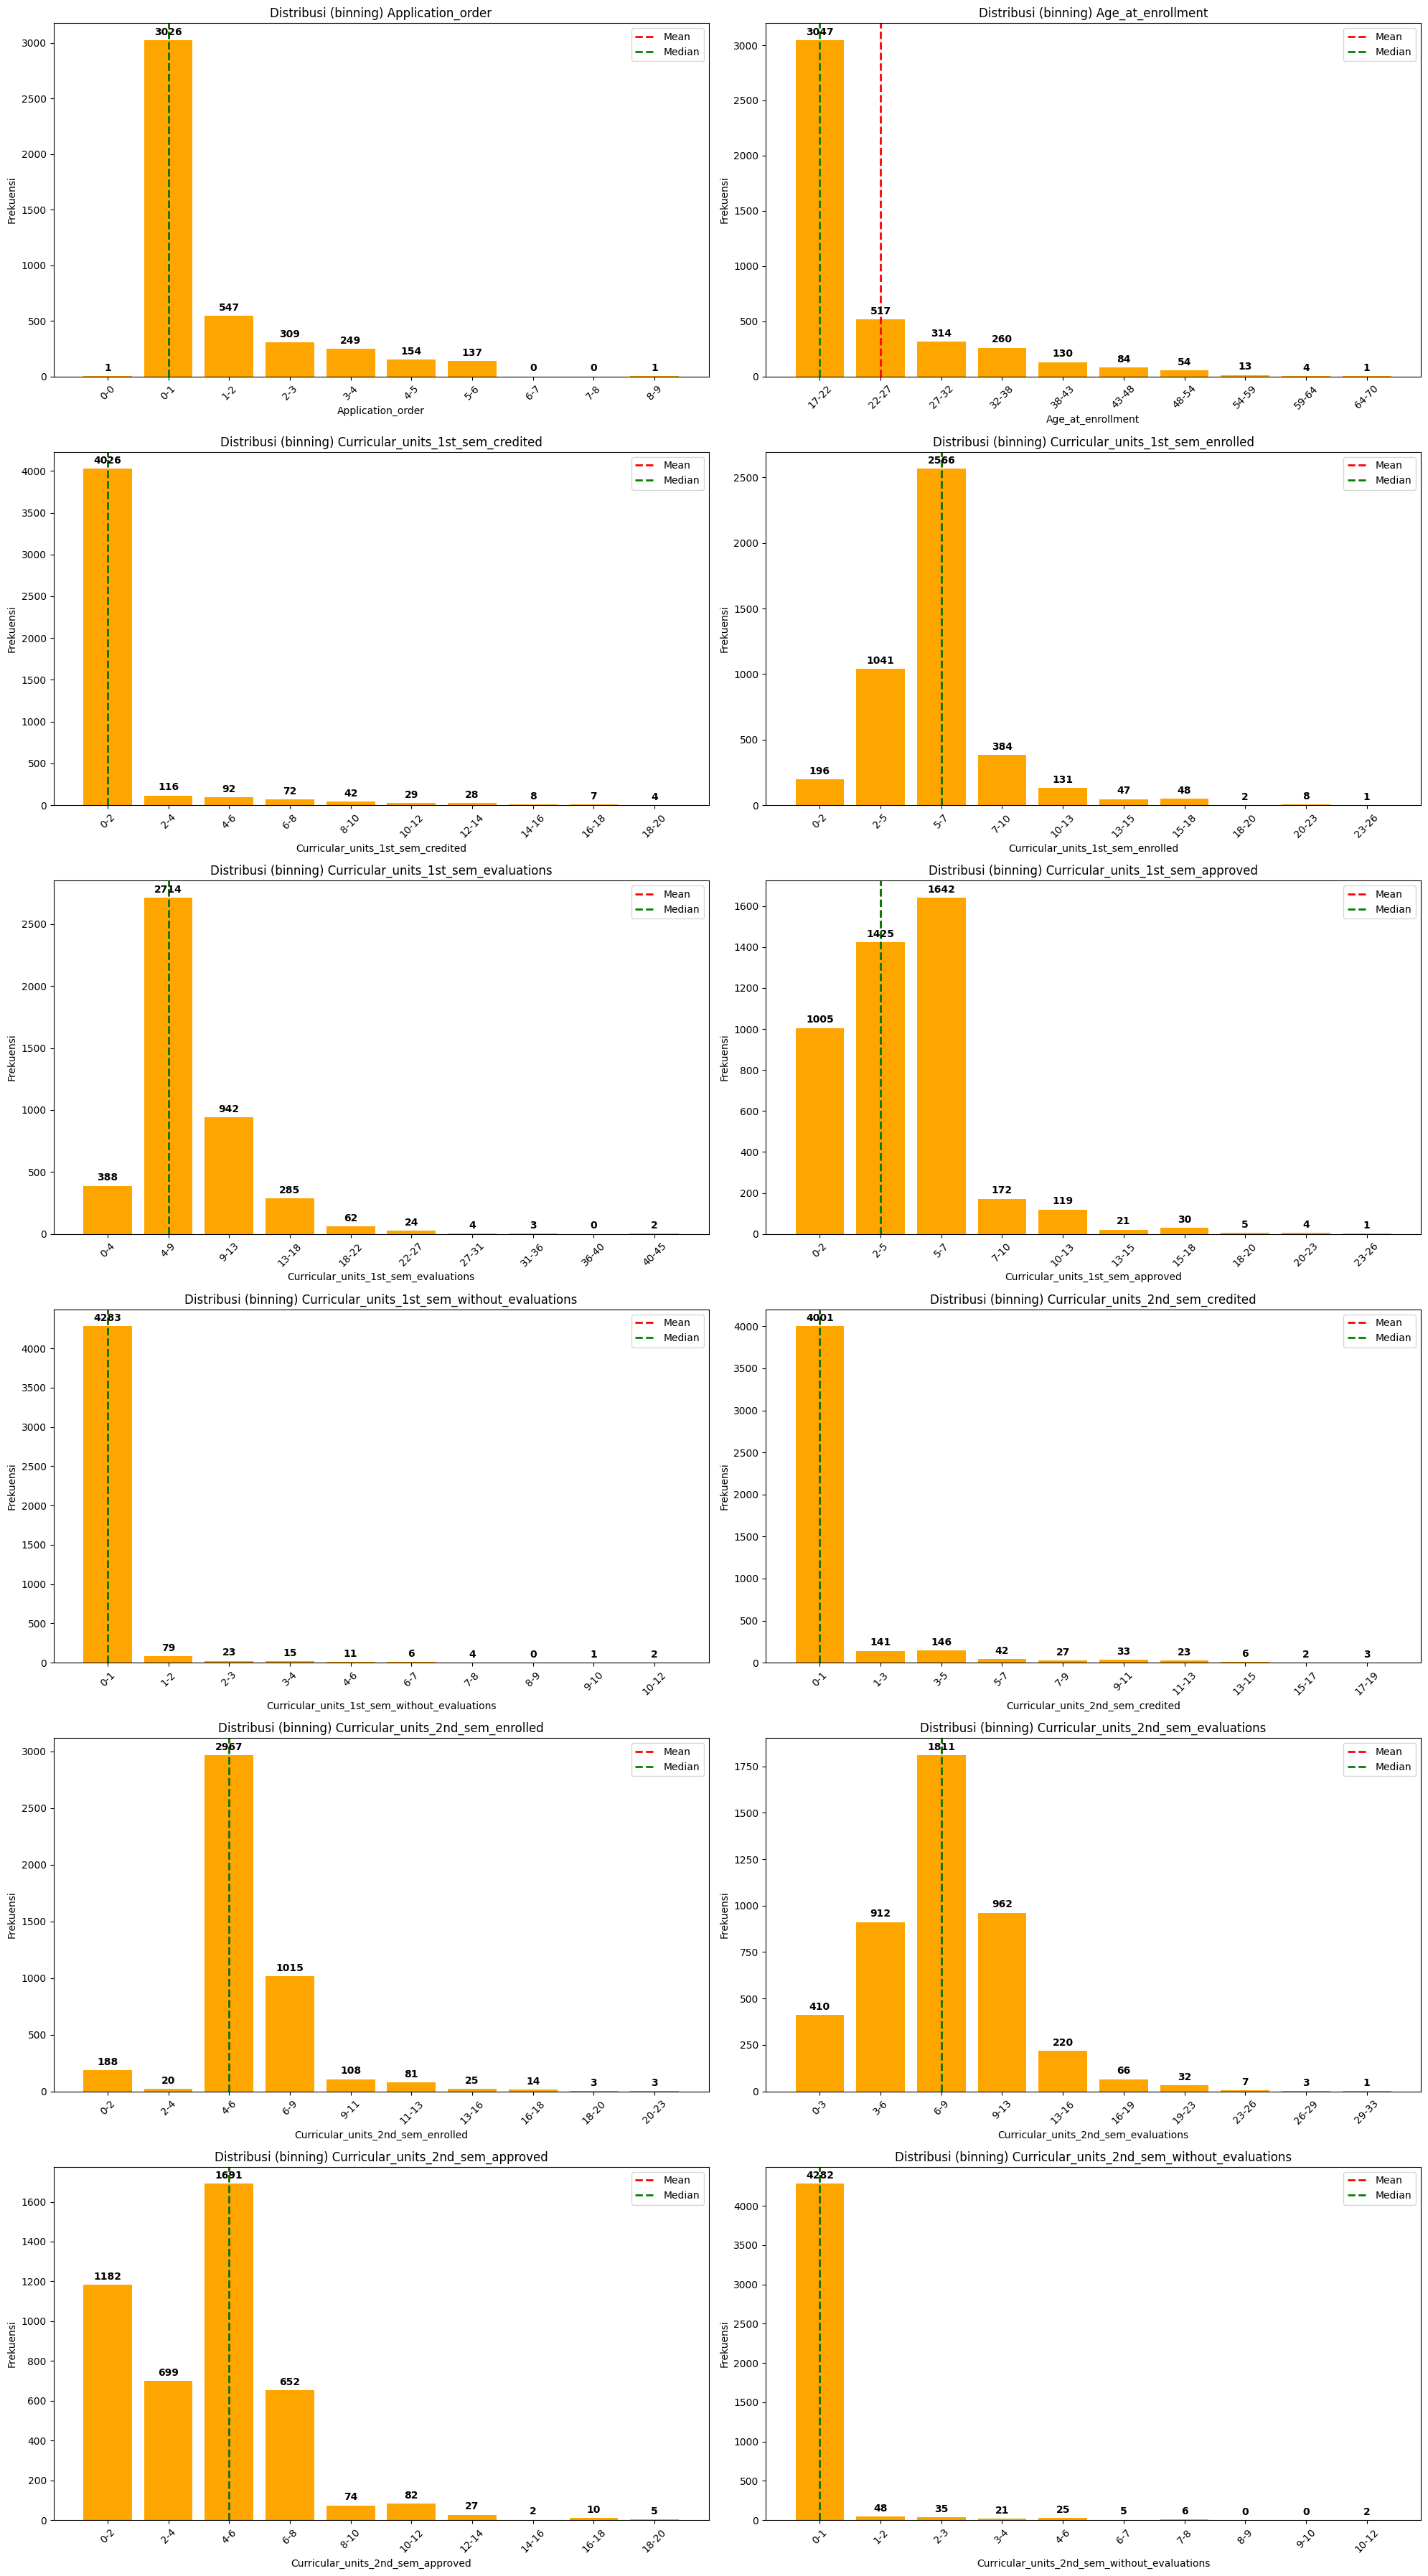

In [53]:
# Visualisasi univariate untuk fitur numerik bertipe int64 dengan binning

# Pilih semua kolom numerik bertipe int64
int_cols = df_eda.select_dtypes(include=['int64']).columns

print("Statistik deskriptif untuk kolom numerik bertipe int64 (dengan jumlah nilai unik):")
desc_int = df_eda[int_cols].describe().T
desc_int['unique'] = df_eda[int_cols].nunique()
print(desc_int)
print("\n")

n_cols = 2
import math
n_rows = math.ceil(len(int_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

for i, col in enumerate(int_cols):
    ax = axes[i]
    # Lakukan binning, misal 10 bin (bisa disesuaikan)
    bin_count = 10
    min_val = df_eda[col].min()
    max_val = df_eda[col].max()
    bins = np.linspace(min_val, max_val, bin_count+1)
    # Hitung frekuensi per bin
    bin_labels = [f"{int(bins[j])}-{int(bins[j+1])}" for j in range(len(bins)-1)]
    binned = pd.cut(df_eda[col], bins=bins, labels=bin_labels, include_lowest=True)
    counts = binned.value_counts().sort_index()
    # Plot bar
    bars = ax.bar(bin_labels, counts, color='orange')
    ax.set_title(f'Distribusi (binning) {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')
    ax.tick_params(axis='x', rotation=45)
    # Tambahkan angka di atas bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 point vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    # Tambahkan garis mean dan median (letakkan pada bin terdekat)
    mean_val = df_eda[col].mean()
    median_val = df_eda[col].median()
    ax.axvline(np.digitize(mean_val, bins)-1, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(np.digitize(median_val, bins)-1, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Statistik deskriptif untuk kolom numerik bertipe float (dengan jumlah nilai unik):
                                 count        mean        std   min     25%  \
Previous_qualification_grade    4424.0  132.613314  13.188332  95.0  125.00   
Admission_grade                 4424.0  126.978119  14.482001  95.0  117.90   
Curricular_units_1st_sem_grade  4424.0   10.640822   4.843663   0.0   11.00   
Curricular_units_2nd_sem_grade  4424.0   10.230206   5.210808   0.0   10.75   

                                       50%         75%         max  unique  
Previous_qualification_grade    133.100000  140.000000  190.000000     101  
Admission_grade                 126.100000  134.800000  190.000000     620  
Curricular_units_1st_sem_grade   12.285714   13.400000   18.875000     805  
Curricular_units_2nd_sem_grade   12.200000   13.333333   18.571429     786  




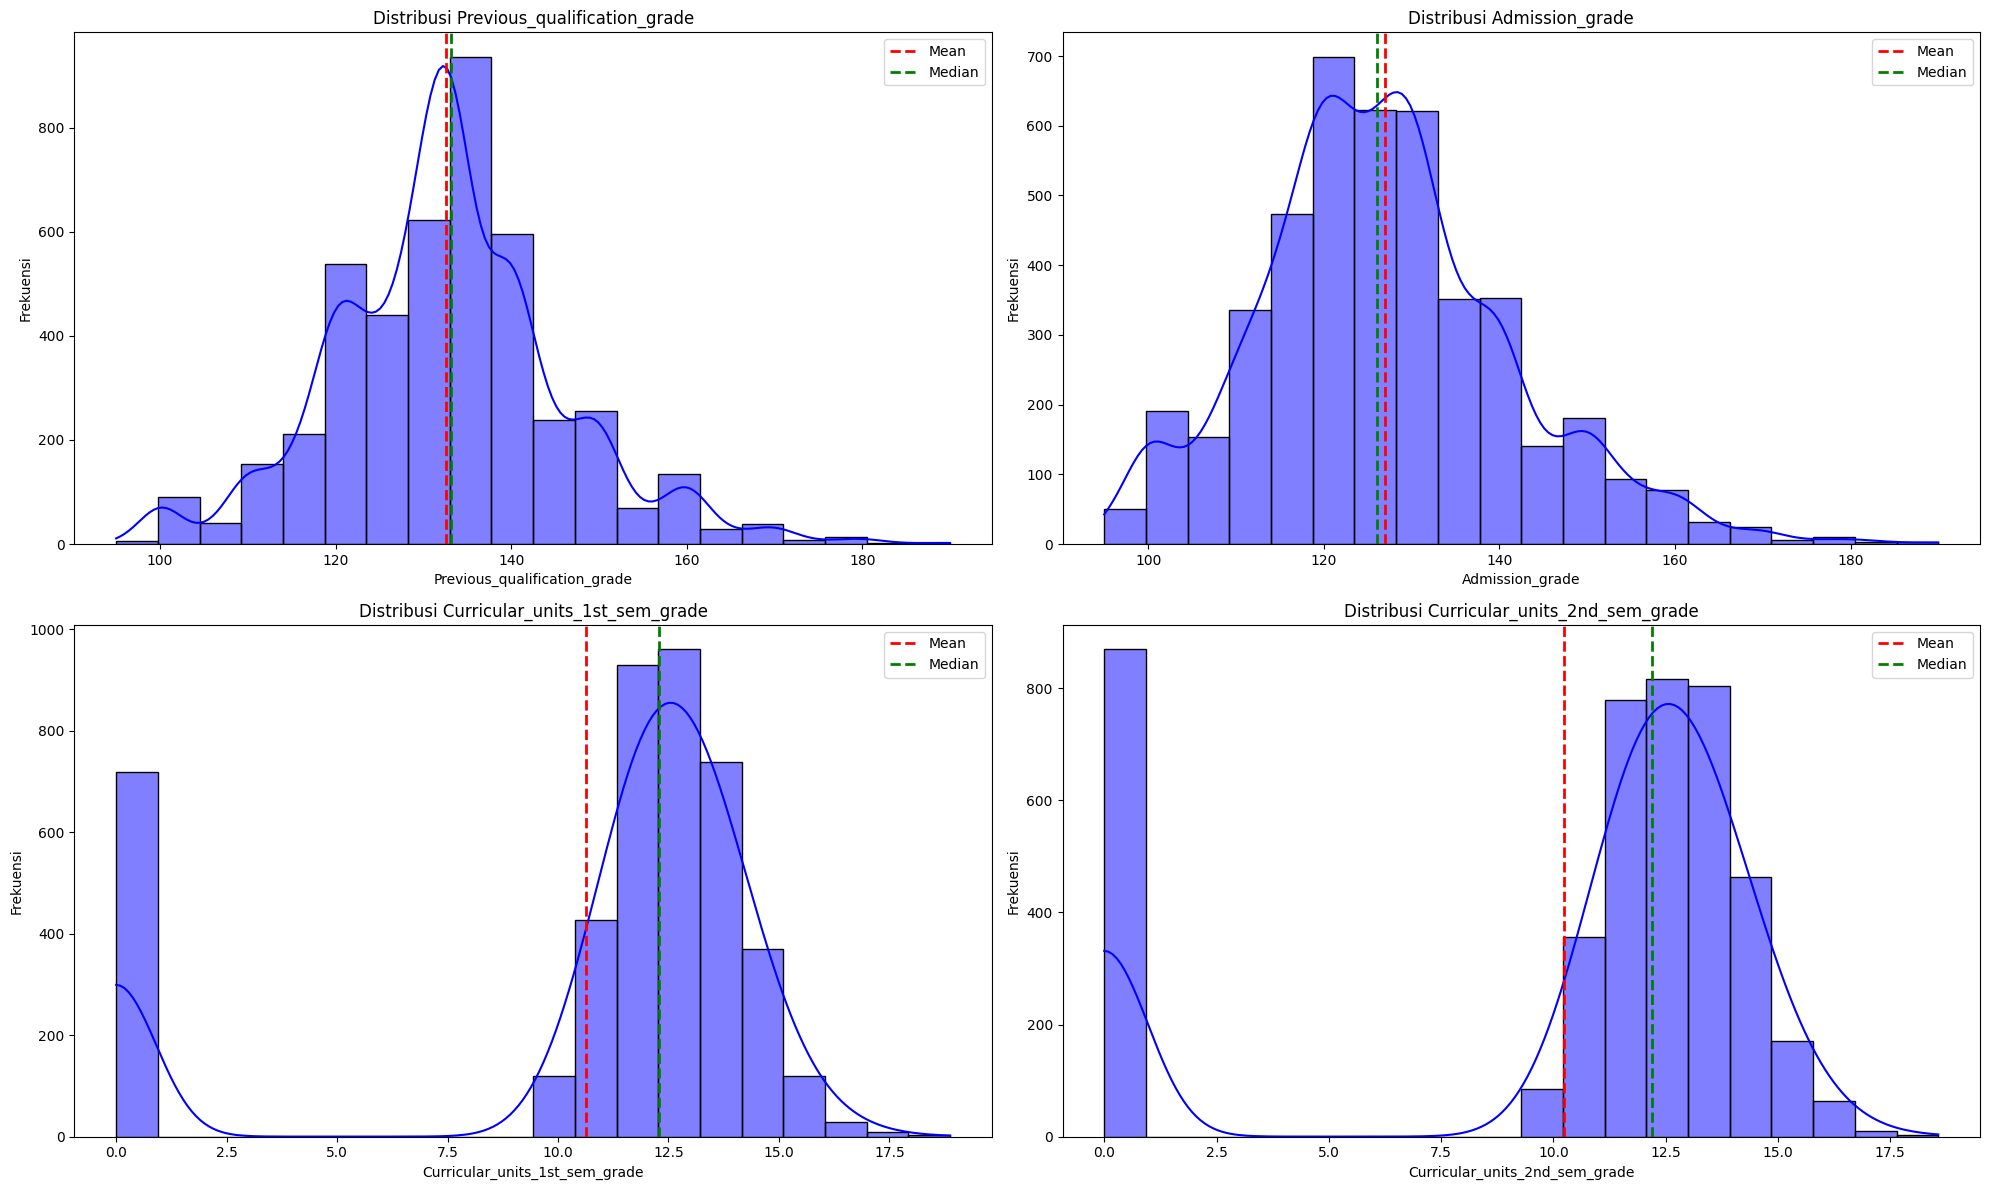

In [54]:
# Pilih semua kolom numerik bertipe float
float_cols = df_eda.select_dtypes(include=['float64']).columns

# Tampilkan statistik deskriptif untuk kolom float dan tambahkan jumlah nilai uniknya
print("Statistik deskriptif untuk kolom numerik bertipe float (dengan jumlah nilai unik):")
desc = df_eda[float_cols].describe().T
desc['unique'] = df_eda[float_cols].nunique()
print(desc)
print("\n")

n_cols = 2
import math
n_rows = math.ceil(len(float_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*10, n_rows*6))
axes = axes.flatten()

for i, col in enumerate(float_cols):
    ax = axes[i]
    sns.histplot(df_eda[col], kde=True, color='blue', bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')
    # Tambahkan garis mean dan median
    mean_val = df_eda[col].mean()
    median_val = df_eda[col].median()
    ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()

# Hapus subplot kosong jika ada
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Insight dari univariate Analysis
Insight Kategorikal :
1. Mahasiswa Graduate atau sudah lulus lebih banyak dibanding mahasiswa yang sedang kuliah ataupun drop out.
2. Marital Status (Status Perkawinan): Sebagian besar mahasiswa belum menikah (3919 mahasiswa), dengan sedikit mahasiswa yang menikah (379 mahasiswa) dan sangat sedikit yang bercerai atau dalam hubungan luar nikah.
3. Application Mode (Mode Pendaftaran): Mayoritas mahasiswa mendaftar melalui "1st phase: general contingent" (1708 mahasiswa), menunjukkan preferensi kuat terhadap fase pendaftaran awal.
4. Course (Mata Kuliah): Jurusan "Nursing" memiliki jumlah mahasiswa terbanyak (766), diikuti "Management" dan "Social Science", menandakan bahwa bidang praktis dan bisnis lebih diminati.
5. Daytime/Evening Attendance (Keikutsertaan Siang/Malam): Mayoritas mahasiswa memilih untuk kuliah di siang hari (3941 mahasiswa), menunjukkan preferensi untuk program penuh waktu.
6. Previous Qualification (Kualifikasi Sebelumnya): Sebagian besar mahasiswa berasal dari pendidikan menengah (3717 mahasiswa), dengan sedikit yang memiliki kualifikasi lebih tinggi.
7. Nationality (Kewarganegaraan): Sebagian besar mahasiswa berasal dari Portugal (4314 mahasiswa), menunjukkan sedikit keberagaman internasional dalam dataset.

Insight Numerikal:
1. Application Order: Sebagian besar mahasiswa memilih urutan aplikasi pertama atau kedua (rata-rata 1.73), menunjukkan bahwa mereka lebih memilih program pertama mereka.
2. Age at Enrollment: Mayoritas mahasiswa mendaftar pada usia sekitar 20 tahun (rata-rata 23.27), dengan rentang usia antara 17 hingga 70 tahun.
3. Curricular Units (Semester 1 & 2): Mahasiswa cenderung memilih beban kuliah antara 5 hingga 7 unit di semester pertama dan kedua, dengan rata-rata yang stabil (6 unit).
4. Semester pertama: Nilai rata-rata 10.64, sebagian besar memperoleh nilai antara 10 hingga 13.
5. Semester kedua: Nilai rata-rata 10.23, dengan performa serupa di semester pertama.
6. Grade: Nilai pada semester pertama dan kedua menunjukkan konsistensi, dengan mayoritas mahasiswa memperoleh nilai sekitar 10 hingga 13.
7. Curricular Units Evaluated: Sebagian besar mahasiswa dievaluasi untuk 6 hingga 10 unit baik di semester pertama maupun kedua.

#### **Bivariate Analysis**

setelah melihat distibusi data di univariate anlysis, dan terlihat bahwa di dominasi pada nilai graduate. untuk bivariate analysis akan dilakukan hanya pada nilai dropout saja, sehingga lebih mudah di analisa untuk pengaruh fitur terhadap dropout mahasiswa

C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\3335061149.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_dropout_only, x='Age_bin', palette='Set1')


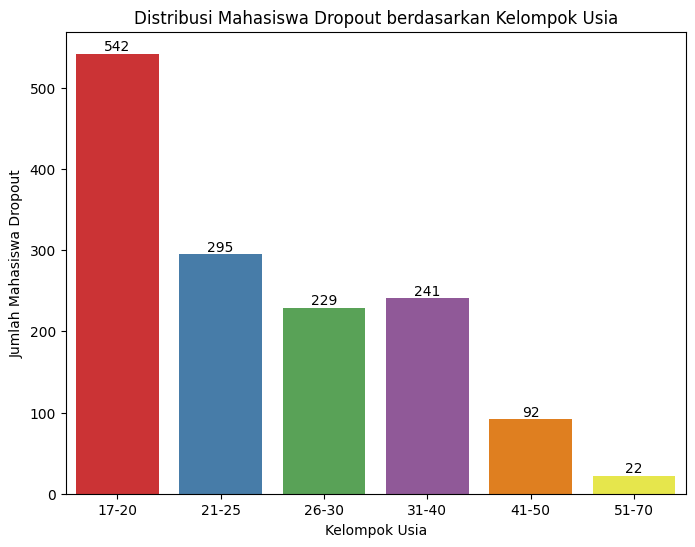

In [55]:
# Visualisasi distribusi mahasiswa Dropout berdasarkan kelompok usia (hanya status Dropout saja)
df_dropout_only = df_eda[df_eda['Status'] == 'Dropout'].copy()

# Membuat bin usia
bins = [16, 20, 25, 30, 40, 50, 70]
labels = ['17-20', '21-25', '26-30', '31-40', '41-50', '51-70']
df_dropout_only['Age_bin'] = pd.cut(df_dropout_only['Age_at_enrollment'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_dropout_only, x='Age_bin', palette='Set1')
plt.title('Distribusi Mahasiswa Dropout berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\1979191929.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Application_mode', palette='Set2')
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\1979191929.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


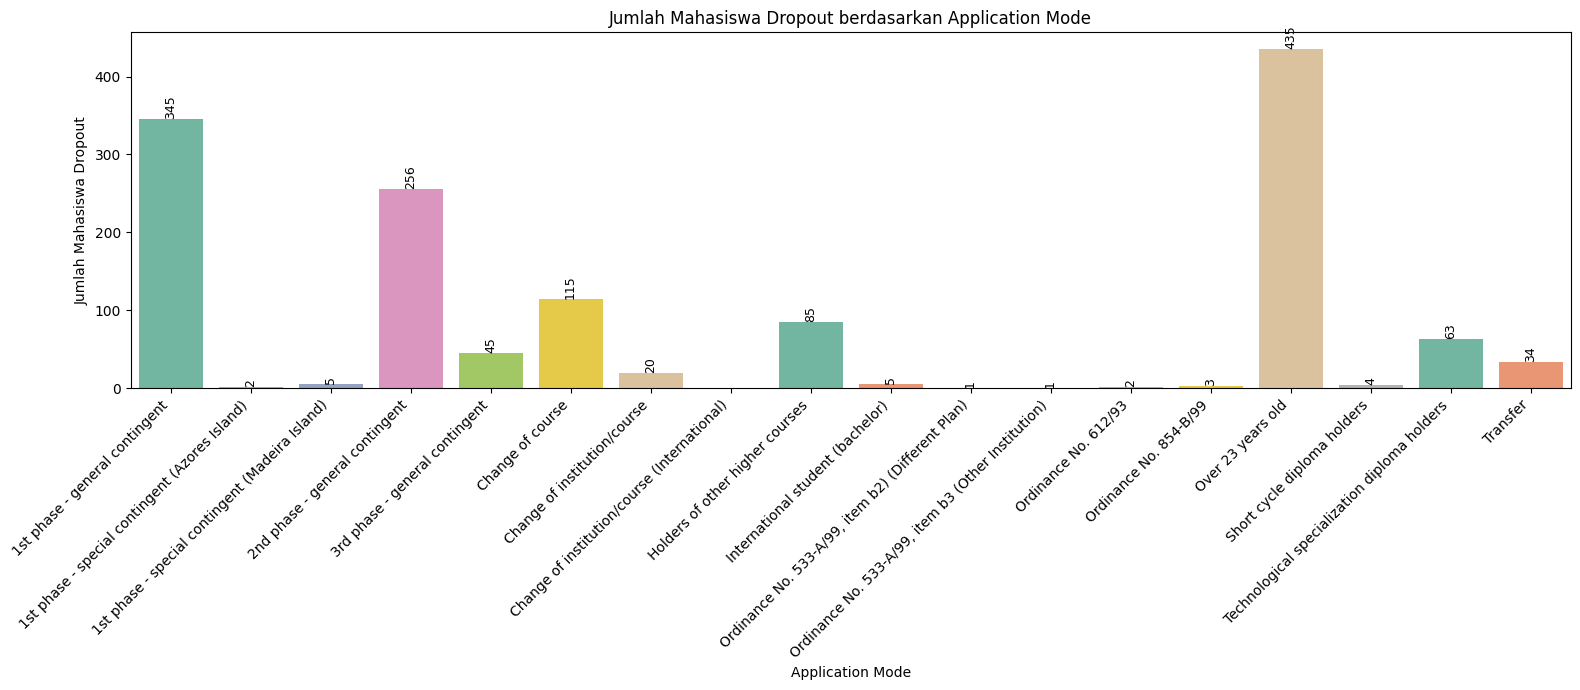

In [56]:
# Visualisasi bivariate antara Application_mode dengan Status khusus untuk mahasiswa Dropout
plt.figure(figsize=(16,7))  # Perbesar figure agar label tidak bertumpuk
ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Application_mode', palette='Set2')
plt.title('Jumlah Mahasiswa Dropout berdasarkan Application Mode')
plt.xlabel('Application Mode')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Putar label x agar tidak saling menimpa
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.tight_layout()
plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\728893698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Course', palette='Set3')
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\728893698.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


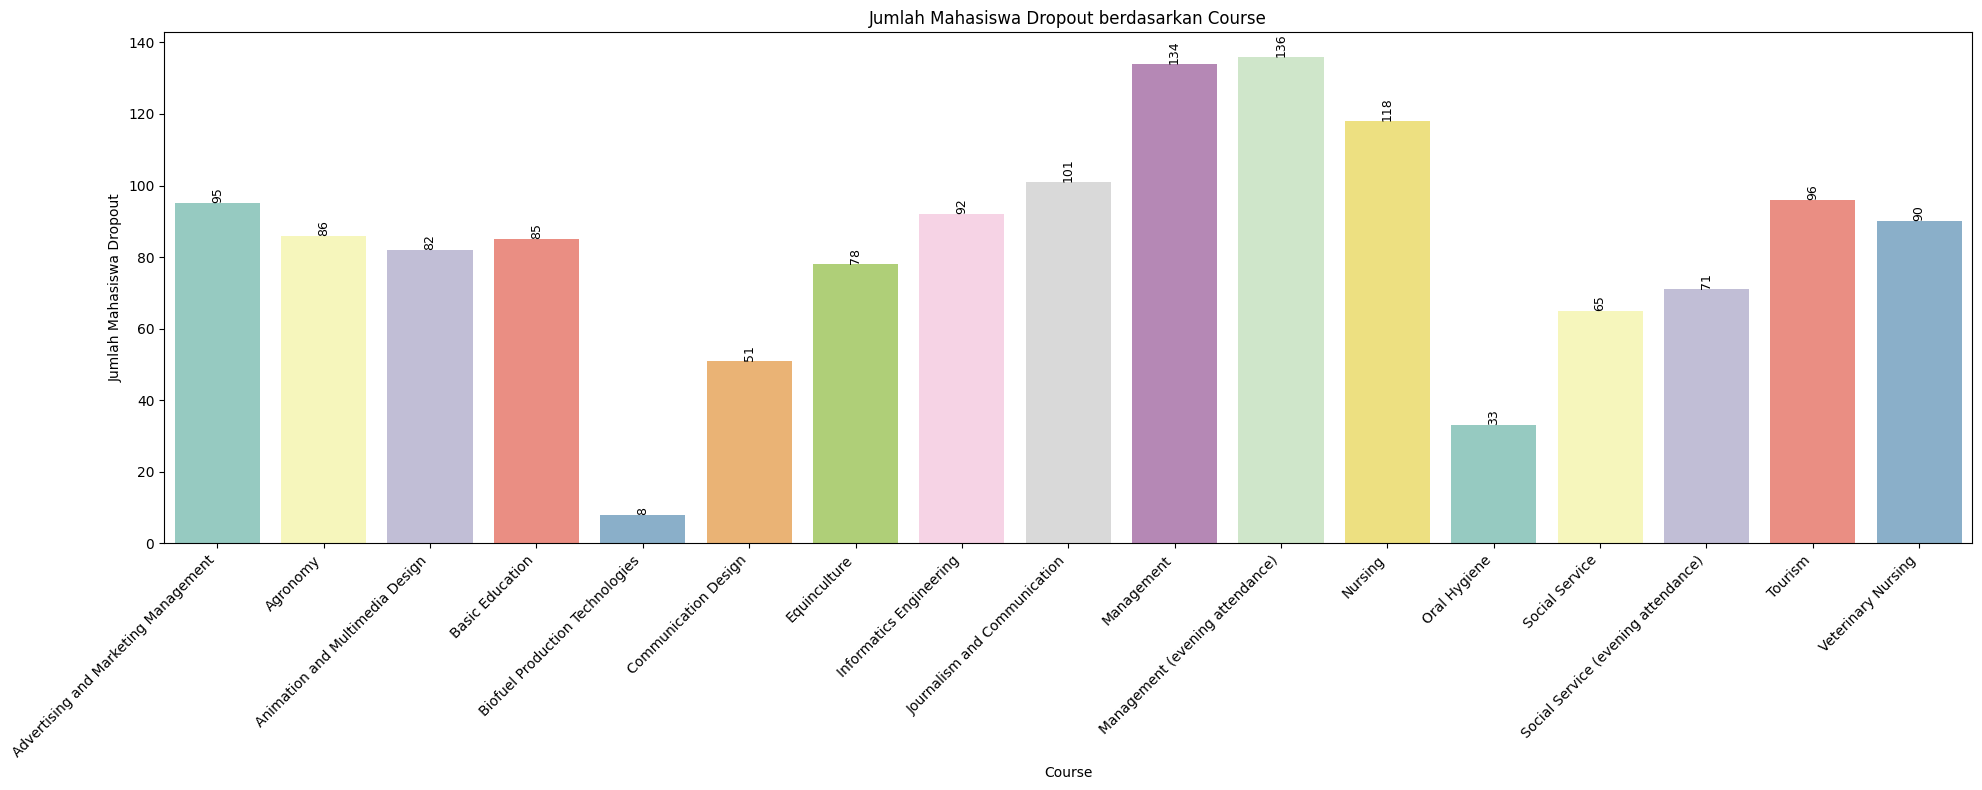

In [57]:
# Visualisasi jumlah mahasiswa Dropout berdasarkan Course

plt.figure(figsize=(20,8))
ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Course', palette='Set3')
plt.title('Jumlah Mahasiswa Dropout berdasarkan Course')
plt.xlabel('Course')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Putar label x agar tidak saling menimpa
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.tight_layout()
plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\552736334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Previous_qualification', palette='Set3')
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\552736334.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


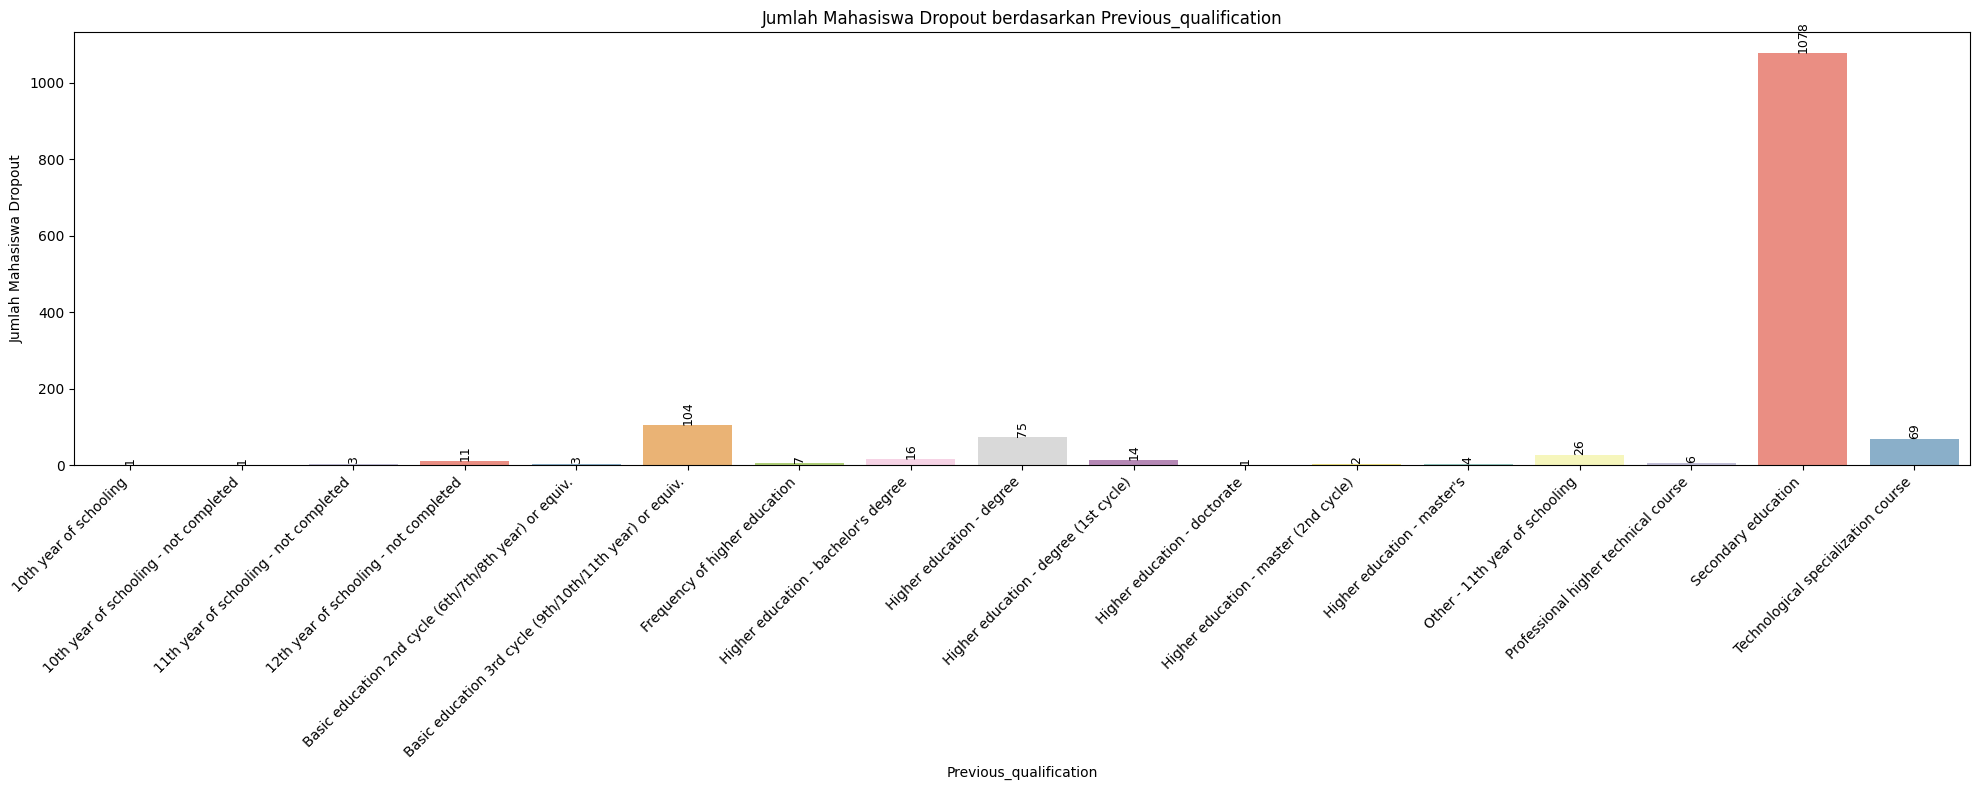

In [58]:
# Visualisasi jumlah mahasiswa Dropout berdasarkan Previous_qualification

plt.figure(figsize=(20,8))
ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Previous_qualification', palette='Set3')
plt.title('Jumlah Mahasiswa Dropout berdasarkan Previous_qualification')
plt.xlabel('Previous_qualification')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Putar label x agar tidak saling menimpa
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', rotation=90)

plt.tight_layout()
plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\1262423369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Scholarship_holder', palette='Set2')
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\1262423369.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)


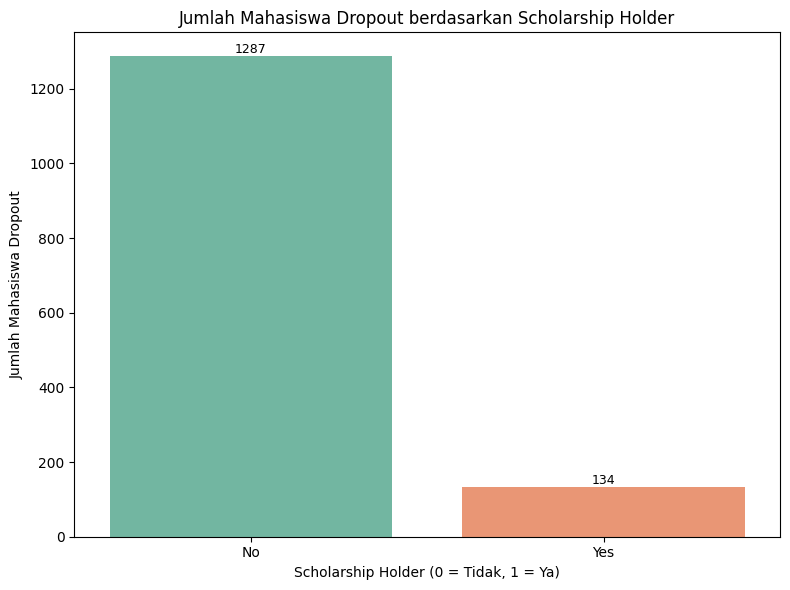

In [59]:
# Visualisasi hubungan antara Status (Dropout) dan Scholarship_holder

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Scholarship_holder', palette='Set2')
plt.title('Jumlah Mahasiswa Dropout berdasarkan Scholarship Holder')
plt.xlabel('Scholarship Holder (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Putar label x agar tidak saling menimpa
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\3043000310.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Displaced', palette='Set1')
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\3043000310.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)


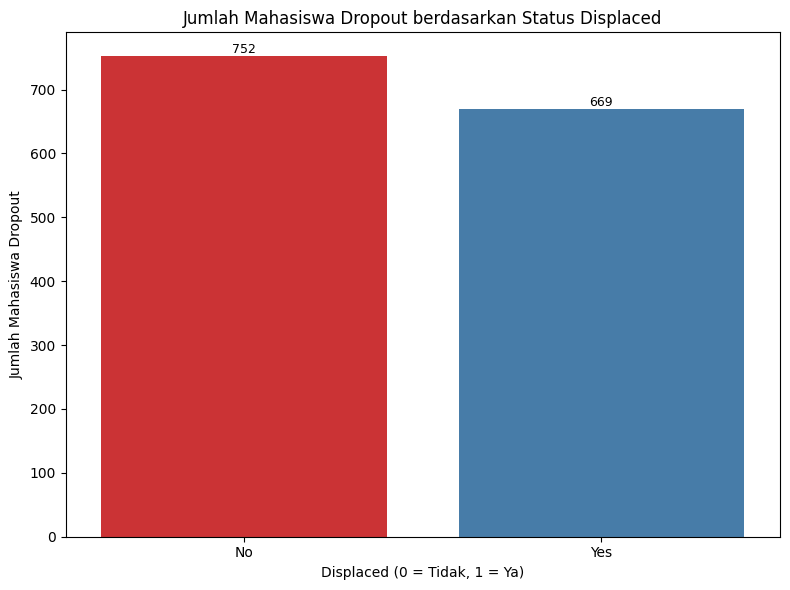

In [60]:
# Visualisasi hubungan antara Status (Dropout) dan Displaced

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df_eda[df_eda['Status'] == 'Dropout'], x='Displaced', palette='Set1')
plt.title('Jumlah Mahasiswa Dropout berdasarkan Status Displaced')
plt.xlabel('Displaced (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa Dropout')

# Putar label x agar tidak saling menimpa
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=10)

# Tampilkan nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9, color='black', rotation=0)

plt.tight_layout()
plt.show()


C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\685715031.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\685715031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


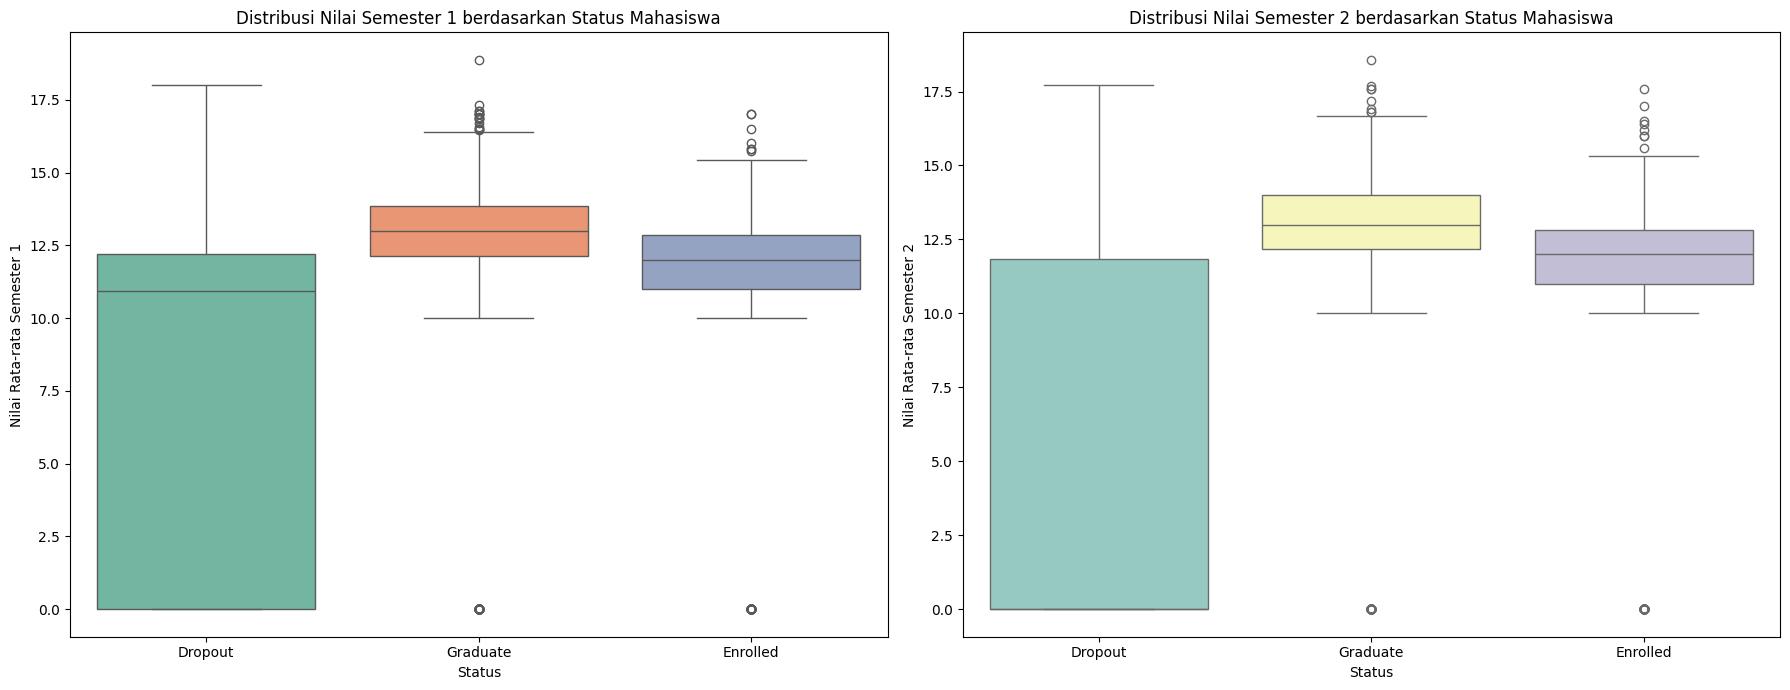

In [61]:
# Visualisasi hubungan antara Status (Dropout) dan Curricular Units (1st & 2nd Semester Grade)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Boxplot untuk nilai semester 1
sns.boxplot(
    data=df_eda, 
    x='Status', 
    y='Curricular_units_1st_sem_grade', 
    palette='Set2', 
    ax=axes[0]
)
axes[0].set_title('Distribusi Nilai Semester 1 berdasarkan Status Mahasiswa')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Nilai Rata-rata Semester 1')

# Boxplot untuk nilai semester 2
sns.boxplot(
    data=df_eda, 
    x='Status', 
    y='Curricular_units_2nd_sem_grade', 
    palette='Set3', 
    ax=axes[1]
)
axes[1].set_title('Distribusi Nilai Semester 2 berdasarkan Status Mahasiswa')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Nilai Rata-rata Semester 2')

plt.tight_layout()
plt.show()

C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\2400204356.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='Status', y='Curricular_units_1st_sem_approved', palette='Set2', ax=axes[0])
C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\2400204356.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_eda, x='Status', y='Curricular_units_2nd_sem_approved', palette='Set3', ax=axes[1])


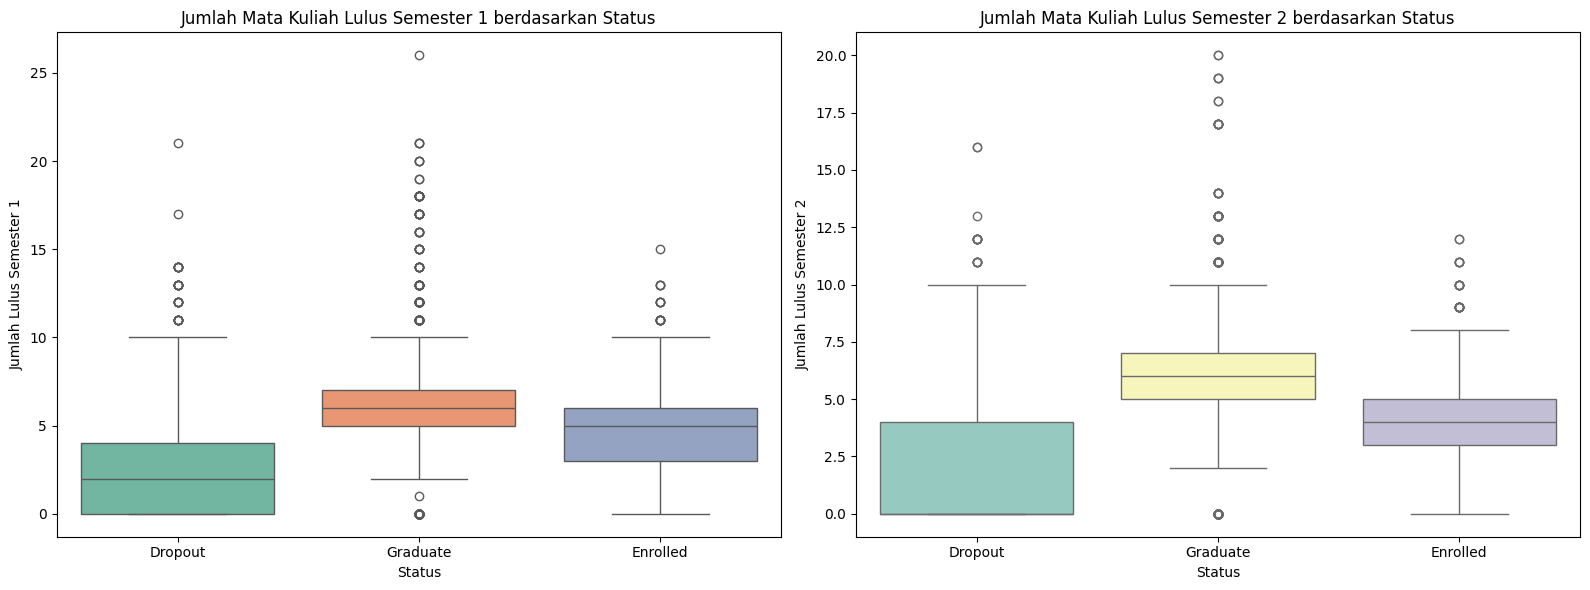

In [62]:
# Visualisasi jumlah curricular units yang diambil dan lulus berdasarkan status
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.boxplot(data=df_eda, x='Status', y='Curricular_units_1st_sem_approved', palette='Set2', ax=axes[0])
axes[0].set_title('Jumlah Mata Kuliah Lulus Semester 1 berdasarkan Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Jumlah Lulus Semester 1')

sns.boxplot(data=df_eda, x='Status', y='Curricular_units_2nd_sem_approved', palette='Set3', ax=axes[1])
axes[1].set_title('Jumlah Mata Kuliah Lulus Semester 2 berdasarkan Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Jumlah Lulus Semester 2')

plt.tight_layout()
plt.show()


**Insight yang didapat dari bivariate analysis :**
1. Dropout Berdasarkan Usia:
      
   Mahasiswa 17-20 tahun memiliki jumlah dropout tertinggi (542), diikuti oleh 21-25 tahun (295). Semakin tua, jumlah dropout menurun.


2. Dropout Berdasarkan Mode Pendaftaran:
   
   Pendaftaran melalui "Over 23 years old" (435) dan "1st phase - general contingent" (345) menunjukkan angka dropout tertinggi.
3. Dropout Berdasarkan Jurusan:
   
   Jurusan Management dan Nursing menunjukkan angka dropout tertinggi (136 dan 118).
4. Dropout Berdasarkan Kualifikasi Sebelumnya:
   
   Mayoritas dropout berasal dari mahasiswa dengan pendidikan menengah (1078).
5. Dropout Berdasarkan Beasiswa:
   
   Mahasiswa tanpa beasiswa (1287) lebih banyak dropout dibandingkan dengan yang memiliki beasiswa (134).
6. Dropout Berdasarkan Status Displaced:
   
   Angka dropout antara displaced (669) dan non-displaced (752) hampir seimbang.
7. Nilai Rata-rata Semester 1:
   
   Dropout memiliki nilai rata-rata lebih rendah dibandingkan Graduate dan Enrolled, dengan Graduate menunjukkan nilai rata-rata lebih stabil dan tinggi.
8. Nilai Rata-rata Semester 2:
   
   Pola serupa dengan Semester 1, di mana mahasiswa Dropout masih menunjukkan nilai yang lebih rendah dibandingkan dengan Graduate dan Enrolled.
9. Jumlah Mata Kuliah Lulus Semester 1:
   
   Dropout menyelesaikan lebih sedikit mata kuliah pada Semester 1, dengan persebaran nilai yang lebih rendah dan lebih banyak outlier.

10. Jumlah Mata Kuliah Lulus Semester 2:
   
    Mahasiswa Dropout cenderung menyelesaikan lebih sedikit mata kuliah dibandingkan Graduate dan Enrolled, meskipun distribusinya lebih terpusat pada Graduate.
   



#### M**ultivariate Analysis**

Korelasi terhadap Status (dari paling signifikan):
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Age_at_enrollment                              -0.243438
Debtor                                         -0.240999
Gender                                         -0.229270
Application_mode                               -0.221747
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_without_evaluations   -0.094028
Curricular_units_2nd_sem_evaluations 

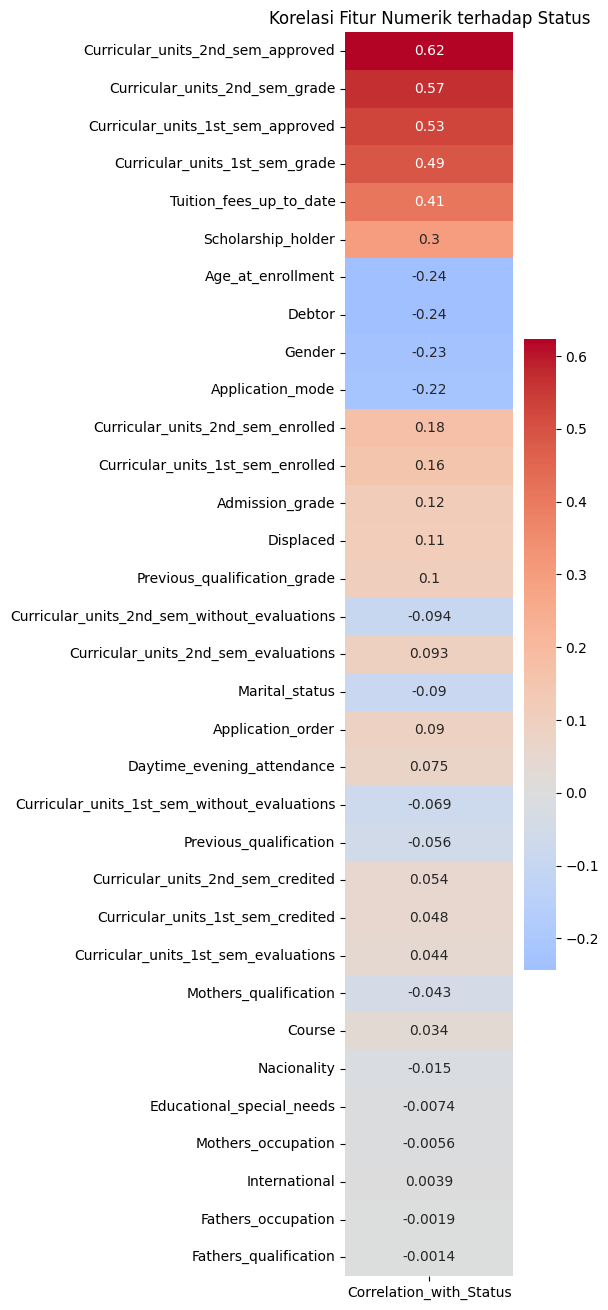

In [63]:
# Melihat nilai korelasi fitur numerik dengan Status

# Pisahkan kolom numerik saja (tanpa mengubah Status)
numeric_cols = df.select_dtypes(include=['number'])

# Hitung korelasi antar kolom numerik
correlation_matrix = numeric_cols.corr()

# Cek apakah kolom 'Status' ada di original dataframe dan numerik
if 'Status' in df.columns and pd.api.types.is_numeric_dtype(df['Status']):
    Status_corr = correlation_matrix['Status'].drop('Status')
else:
    # Hitung korelasi manual antara Status (non-numerik) dan kolom numerik
    Status_corr = df[numeric_cols.columns].apply(lambda x: df['Status'].astype('category').cat.codes.corr(x))

# Urutkan korelasi berdasarkan kekuatan absolut
correlation_with_Status_sorted = Status_corr.reindex(
    Status_corr.abs().sort_values(ascending=False).index
)

# Tampilkan hasil
print("Korelasi terhadap Status (dari paling signifikan):")
print(correlation_with_Status_sorted)

correlation_df = correlation_with_Status_sorted.to_frame(name="Correlation_with_Status")

# Plot heatmap
plt.figure(figsize=(6, len(correlation_df) * 0.4))  # Sesuaikan tinggi dengan jumlah fitur
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik terhadap Status")
plt.tight_layout()
plt.show()


Hasil Uji Chi-Square untuk fitur numerik non-negatif terhadap Status:
                                         Feature   Chi2 Score        P-Value
14                Curricular_units_2nd_sem_grade  3980.634363   0.000000e+00
13             Curricular_units_2nd_sem_approved  3530.526536   0.000000e+00
7              Curricular_units_1st_sem_approved  2519.752869   0.000000e+00
8                 Curricular_units_1st_sem_grade  2379.656478   0.000000e+00
3                              Age_at_enrollment   715.976606  3.370198e-156
12          Curricular_units_2nd_sem_evaluations   326.618731   1.190265e-71
6           Curricular_units_1st_sem_evaluations   155.384284   1.814394e-34
15  Curricular_units_2nd_sem_without_evaluations   151.284564   1.409206e-33
10             Curricular_units_2nd_sem_credited   134.975727   4.902225e-30
4              Curricular_units_1st_sem_credited   124.849551   7.749335e-28
2                                Admission_grade   115.944254   6.653118e-26
5     

C:\Users\ardhi\AppData\Local\Temp\ipykernel_31600\1065088793.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


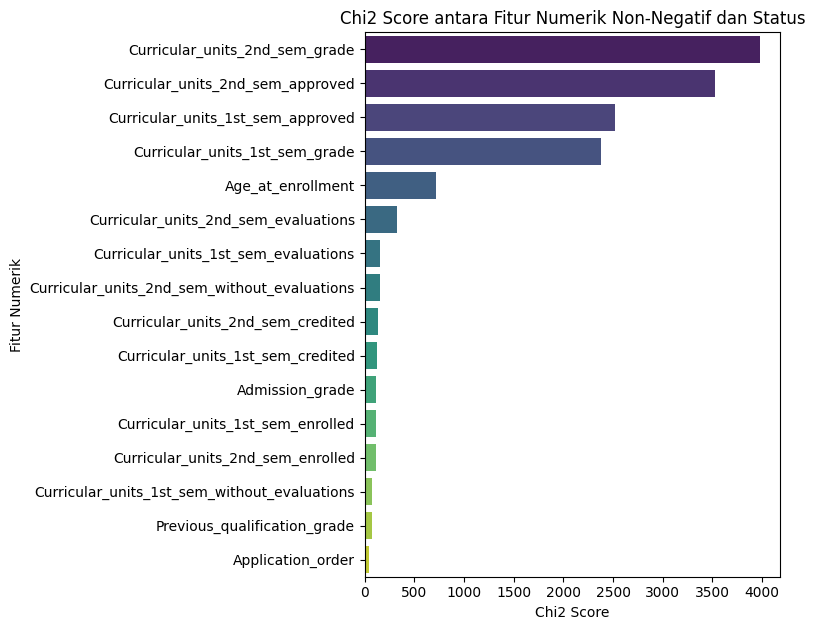

In [64]:
# Uji Chi-Square untuk fitur numerik (non-negatif) terhadap Status

# Seleksi semua kolom numerik + kolom target 'Status'
numerical_df = df_eda.select_dtypes(include=['number']).copy()
numerical_df["Status"] = df_eda["Status"]

X = numerical_df.drop("Status", axis=1)
y = numerical_df["Status"]

X_non_negative = X.loc[:, (X >= 0).all()]

# Hitung skor chi2
chi_scores, p_values = chi2(X_non_negative, y)

chi2_result = pd.DataFrame({
    'Feature': X_non_negative.columns,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
}).sort_values(by="Chi2 Score", ascending=False)

# 6. Tampilkan hasil
print("Hasil Uji Chi-Square untuk fitur numerik non-negatif terhadap Status:")
print(chi2_result)

# Visualisasi: Barplot Chi2 Score
plt.figure(figsize=(8, len(chi2_result)*0.4))
sns.barplot(
    data=chi2_result,
    y='Feature',
    x='Chi2 Score',
    palette='viridis'
)
plt.xlabel('Chi2 Score')
plt.ylabel('Fitur Numerik')
plt.title('Chi2 Score antara Fitur Numerik Non-Negatif dan Status')
plt.tight_layout()
plt.show()


**Insight dari Multivariate Analysis :**
1. Chi-Square Analysis Insight

    Fitur yang Paling Signifikan Terhadap Status Mahasiswa:

        Curricular_units_2nd_sem_grade, Curricular_units_2nd_sem_approved, dan Curricular_units_1st_sem_approved memiliki skor Chi-Square yang sangat tinggi, menunjukkan bahwa nilai pada kedua semester dan status persetujuan unit memiliki hubungan kuat dengan status mahasiswa (graduate, enrolled, dropout).

    Faktor Utama Dropout:

        Mahasiswa dengan nilai yang lebih rendah di semester pertama dan kedua serta yang memiliki sedikit kredit yang disetujui memiliki risiko lebih besar untuk dropout.

2. Korelasi Heatmap Insight

    Korelasi Positif dengan Status Graduate:

        Curricular_units_2nd_sem_approved (0.62), Curricular_units_2nd_sem_grade (0.57), dan Curricular_units_1st_sem_approved (0.53) memiliki korelasi kuat dengan status kelulusan, menandakan bahwa mahasiswa yang berhasil menyelesaikan lebih banyak unit dan mendapat evaluasi positif memiliki kemungkinan lebih besar untuk lulus.

    Korelasi Negatif dengan Dropout:

        Faktor seperti Age_at_enrollment (-0.24), Debtor (-0.24), dan Gender (-0.23) menunjukkan bahwa mahasiswa yang lebih muda, tidak berhutang, dan jenis kelamin tertentu lebih kecil kemungkinannya untuk dropout.

        Tuition_fees_up_to_date (0.41) menunjukkan bahwa mahasiswa yang membayar biaya kuliah tepat waktu lebih cenderung tidak dropout.

In [65]:
# Ekspor data fitur (belum dinormalisasi) ke CSV untuk keperluan Metabase
df_eda.to_csv('data_metabase.csv', index=False)
df_eda.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,Personal Services/Security/Sellers,Unskilled Workers,127.3,Yes,No,No,Yes,Male,No,20,No,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,Intermediate Technician/Profession,Intermediate Technician/Profession,142.5,Yes,No,No,No,Male,No,19,No,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,124.8,Yes,No,No,No,Male,No,19,No,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,Personal Services/Security/Sellers,Intermediate Technician/Profession,119.6,Yes,No,No,Yes,Female,No,20,No,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,141.5,No,No,No,Yes,Female,No,45,No,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,Graduate


#### **Feature Engineering**

In [66]:
# Ambil fitur yang diinginkan dari dataframe df dan inisialisasi ke df_selected
fitur = [
    'Status',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment',
    'Debtor',
    'Scholarship_holder',
    'Tuition_fees_up_to_date',
    'Course',
    'Application_mode',
    'Previous_qualification'
]
df_selected = df[fitur].copy()

# Ubah kolom Status menjadi hanya 2 nilai: 'Dropout' dan 'Stay'
df_selected['Status'] = df_selected['Status'].replace({'Enrolled': 'Stay', 'Graduate': 'Stay', 'Dropout': 'Dropout'})

In [67]:
#Validasi kolom yang diambil
df_selected.head()

,Status,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Age_at_enrollment,Debtor,Scholarship_holder,Tuition_fees_up_to_date,Course,Application_mode,Previous_qualification
0,Dropout,0,0.000000,0,0.000000,20,0,0,1,171,17,1
1,Stay,6,13.666667,6,14.000000,19,0,0,0,9254,15,1
2,Dropout,0,0.000000,0,0.000000,19,0,0,0,9070,1,1
3,Stay,5,12.400000,6,13.428571,20,0,0,1,9773,17,1
4,Stay,6,13.000000,5,12.333333,45,0,0,1,8014,39,1


In [68]:
#cek isi data
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             4424 non-null   object 
 1   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 2   Curricular_units_2nd_sem_grade     4424 non-null   float64
 3   Curricular_units_1st_sem_approved  4424 non-null   int64  
 4   Curricular_units_1st_sem_grade     4424 non-null   float64
 5   Age_at_enrollment                  4424 non-null   int64  
 6   Debtor                             4424 non-null   int64  
 7   Scholarship_holder                 4424 non-null   int64  
 8   Tuition_fees_up_to_date            4424 non-null   int64  
 9   Course                             4424 non-null   int64  
 10  Application_mode                   4424 non-null   int64  
 11  Previous_qualification             4424 non-null   int64

#### **Encoding kolom target**

In [69]:
# Lakukan encoding pada kolom Status menggunakan LabelEncoder dari sklearn
le = LabelEncoder()
df_selected['Status'] = le.fit_transform(df_selected['Status'])

# Tampilkan mapping label encoding
print("Mapping Label Encoding Status:")
for idx, kelas in enumerate(le.classes_):
    print(f"{kelas}: {idx}")


Mapping Label Encoding Status:
Dropout: 0
Stay: 1


In [70]:
# Hapus data yang terduplikat dan sisakan 1 nilai untuk tiap duplikasinya
print("Jumlah data null tiap kolom:")
print(df_selected.isnull().sum())

# Cek jumlah data duplikat sebelum dihapus
jumlah_duplikat = df_selected.duplicated().sum()
print("\nJumlah data duplikat sebelum dihapus:", jumlah_duplikat)

# Hapus duplikat, hanya menyisakan satu data untuk setiap duplikat
df_selected = df_selected.drop_duplicates()

# Cek jumlah data duplikat setelah dihapus
jumlah_duplikat_setelah = df_selected.duplicated().sum()
print("Jumlah data duplikat setelah dihapus:", jumlah_duplikat_setelah)
print("Jumlah data setelah menghapus duplikat:", len(df_selected))


Jumlah data null tiap kolom:
Status                               0
Curricular_units_2nd_sem_approved    0
Curricular_units_2nd_sem_grade       0
Curricular_units_1st_sem_approved    0
Curricular_units_1st_sem_grade       0
Age_at_enrollment                    0
Debtor                               0
Scholarship_holder                   0
Tuition_fees_up_to_date              0
Course                               0
Application_mode                     0
Previous_qualification               0
dtype: int64

Jumlah data duplikat sebelum dihapus: 145
Jumlah data duplikat setelah dihapus: 0
Jumlah data setelah menghapus duplikat: 4279


In [71]:
# Menghapus data duplikat dan hanya menyisakan satu nilai untuk setiap data yang terduplikat
df_selected = df_selected.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", len(df_selected))


Jumlah data setelah menghapus duplikat: 4279


In [72]:
# Mengatasi nilai NaN pada kolom Status, padahal seharusnya hanya berisi 1 dan 0

# Cek unique value pada kolom Status setelah mapping
print("Unique value kolom Status setelah mapping:")
print(df_selected['Status'].unique())

# Cek jumlah NaN pada kolom Status
jumlah_nan_status = df_selected['Status'].isna().sum()
print("Jumlah NaN pada kolom Status:", jumlah_nan_status)

# Jika ada nilai NaN, artinya ada data yang tidak sesuai dengan mapping ('Dropout' atau 'No Dropout')
# Solusi: Hapus baris yang nilai Status-nya NaN agar hanya tersisa 1 dan 0 saja
if jumlah_nan_status > 0:
    print(f"Menghapus {jumlah_nan_status} baris yang memiliki Status NaN...")
    df_selected = df_selected.dropna(subset=['Status'])
else:
    print("Tidak ada nilai NaN pada kolom Status.")

# Pastikan kembali hanya ada 1 dan 0 pada kolom Status
print("Unique value kolom Status setelah menghapus NaN:")
print(df_selected['Status'].unique())


Unique value kolom Status setelah mapping:
[0 1]
Jumlah NaN pada kolom Status: 0
Tidak ada nilai NaN pada kolom Status.
Unique value kolom Status setelah menghapus NaN:
[0 1]


#### **Normalisasi Data fitur numerik**

In [73]:
# Normalisasi data menggunakan StandardScaler hanya pada fitur numerik (kecuali kolom target 'Status')

# Identifikasi kolom numerik selain 'Status'
fitur_numerik = df_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Status' in fitur_numerik:
    fitur_numerik.remove('Status')

scaler = StandardScaler()
df_selected_normalized = df_selected.copy()
df_selected_normalized[fitur_numerik] = scaler.fit_transform(df_selected[fitur_numerik])

# Tampilkan beberapa data hasil normalisasi
print(df_selected_normalized.head())


   Status  Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0       0                          -1.550017                       -2.132821   
1       1                           0.481280                        0.627195   
2       0                          -1.550017                       -2.132821   
3       1                           0.142730                        0.371389   
4       1                           0.481280                        0.492561   

   Curricular_units_1st_sem_approved  Curricular_units_1st_sem_grade  \
0                          -1.606380                       -2.429100   
1                           0.377563                        0.667266   
2                          -1.606380                       -2.429100   
3                           0.377563                        0.540883   
4                           0.046906                        0.298651   

   Age_at_enrollment   Debtor  Scholarship_holder  Tuition_fees_up_to_date  \
0       

In [74]:
#cek jumlah data tiap kelas
print(df_selected_normalized['Status'].value_counts())

Status
1    2932
0    1347
Name: count, dtype: int64


In [75]:
# Memisahkan data menjadi data latih dan data uji untuk keperluan modeling

# Kolom target adalah 'Status', sisanya sebagai fitur untuk pelatihan
X = df_selected_normalized.drop('Status', axis=1)
y = df_selected_normalized['Status']

# Split data: 80% train, 20% test, random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 3423
Jumlah data uji: 856


In [76]:
# Ekspor data fitur (belum dinormalisasi) ke CSV untuk keperluan Metabase
# Data yang diekspor: seluruh fitur + kolom target 'Status' (dari df_selected)
df_selected.to_csv('data_metabase.csv', index=False)
print("Data untuk Metabase berhasil diekspor ke 'data_metabase.csv'")


Data untuk Metabase berhasil diekspor ke 'data_metabase.csv'


## Modeling

In [77]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Performa tanpa SMOTE:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test.astype(int), y_pred))

Performa tanpa SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       269
           1       0.87      0.93      0.90       587

    accuracy                           0.86       856
   macro avg       0.85      0.82      0.83       856
weighted avg       0.86      0.86      0.86       856

[[189  80]
 [ 41 546]]


## Evaluation

Cross-validation F1 scores: [0.86203138 0.867368   0.84900825 0.86252202 0.85337602]
Mean F1 score: 0.8588611336336814


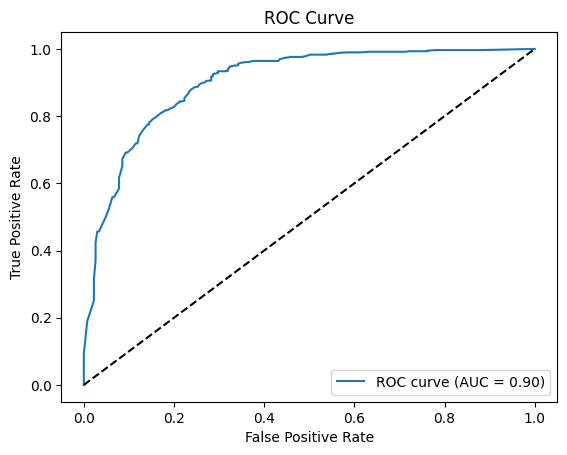

In [78]:
# Terapkan cross_val_score untuk validasi silang dengan F1 score
scores = cross_val_score(rf, X, y, cv=5, scoring='f1_weighted')
print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())


# Terapkan ROC Curve dan hitung AUC
y_pred_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

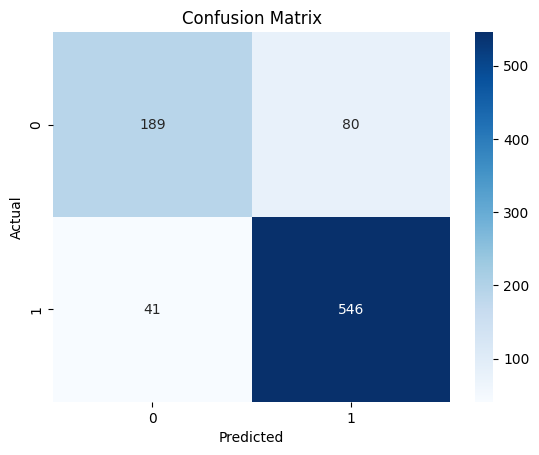

In [79]:
# Confusion Matrix untuk model RandomForest
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

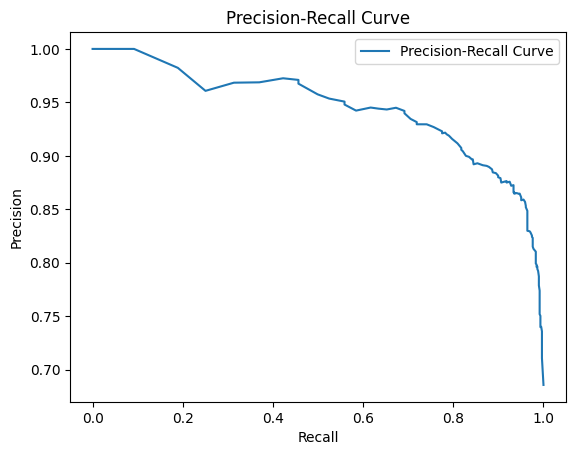

In [80]:
#Precision-Recall Curve untuk model RandomForest
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

                              Feature  Importance
0   Curricular_units_2nd_sem_approved    0.219889
1      Curricular_units_2nd_sem_grade    0.183335
3      Curricular_units_1st_sem_grade    0.137634
2   Curricular_units_1st_sem_approved    0.119151
4                   Age_at_enrollment    0.084491
8                              Course    0.075606
7             Tuition_fees_up_to_date    0.073495
9                    Application_mode    0.045768
5                              Debtor    0.024121
6                  Scholarship_holder    0.021857
10             Previous_qualification    0.014653


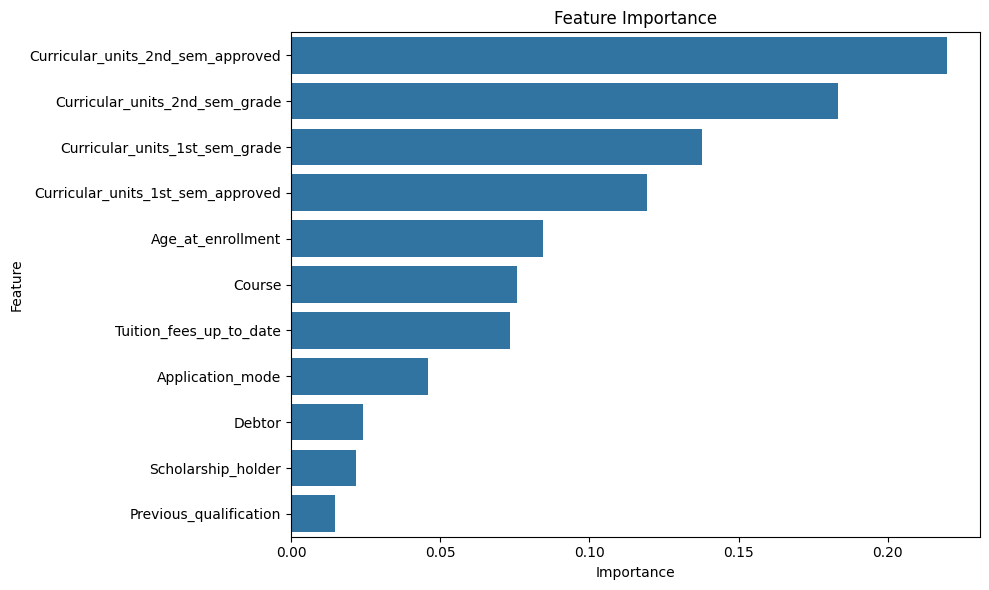

In [81]:
# Feature Importance untuk model RandomForest
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

kesimpulan dari model ini adalah :
1. Confusion Matrix
 - True Positive (TP): 546, True Negative (TN): 189
 - False Positive (FP): 80, False Negative (FN): 41

2. ROC Curve (AUC = 0.90)

    AUC 0.90 menunjukkan kemampuan model membedakan antara kelas positif dan negatif sangat baik  dan ROC curve menjauhi garis diagonal (random guess), artinya model sudah sangat optimal dalam klasifikasi.

3. Precision-Recall Curve
    Precision tinggi (di atas 0.9) untuk sebagian besar nilai recall, menandakan model minim false positive. Cocok untuk kasus di mana deteksi positif yang akurat sangat penting (misal: deteksi dropout, penyakit, dsb).

4. Feature Importance
   Fitur akademik awal (nilai & kelulusan semester 1 & 2) menjadi faktor utama model dalam mengambil keputusan. Faktor lain seperti umur, jurusan, status pembayaran, punya pengaruh menengah dan Fitur seperti status beasiswa, utang, dan kualifikasi sebelumnya pengaruhnya kecil terhadap prediksi.




In [82]:


# Simpan model RandomForest ke file .joblib
joblib.dump(rf, 'model_prediksi.joblib')
joblib.dump(scaler, 'scaler.joblib') 

# Simpan model RandomForest ke file .pkl
with open('model_prediksi.pkl', 'wb') as f:
    pickle.dump(rf, f)

